# **LSTM Model**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Load the dataset
df = pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')

In [9]:
# Display initial data and check for null values
print("Initial Data:")
print(df.head())
print("\nData Description:")
print(df.describe())
print("\nNull Values Check:")
print(df.isnull().sum())

Initial Data:
         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  

Data Description:
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331

In [10]:
# Selecting 'Close' column as the target variable
df = df[['Close']]

In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [12]:
# Function to create dataset with time steps for LSTM
def create_dataset(data, time_step):
    x, y = [], []
    for i in range(len(data)-time_step-1):
        x.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

In [13]:
# Set time step for LSTM
time_step = 100
x, y = create_dataset(scaled_data, time_step)

In [14]:
# Reshape data for LSTM (samples, time steps, features)
x = x.reshape(x.shape[0], x.shape[1], 1)

In [15]:
# Reshape data for LSTM (samples, time steps, features)
x = x.reshape(x.shape[0], x.shape[1], 1)

In [16]:
# Build LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Train LSTM model
model_lstm.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - RootMeanSquaredError: 0.3322 - loss: 0.1160
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - RootMeanSquaredError: 0.0898 - loss: 0.0081
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - RootMeanSquaredError: 0.0684 - loss: 0.0047
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - RootMeanSquaredError: 0.0646 - loss: 0.0042
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - RootMeanSquaredError: 0.0612 - loss: 0.0038
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - RootMeanSquaredError: 0.0588 - loss: 0.0035
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - RootMeanSquaredError: 0.0631 - loss: 0.0040
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - RootMeanSquaredError: 0.0601 - loss: 0.0036
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - RootMeanSquaredError: 0.0543 - loss: 0.0030
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - RootMeanSquaredError: 0.0557 - loss: 0.0031
Epoch 11/

In [18]:
# Evaluate LSTM model
train_pred_lstm = scaler.inverse_transform(model_lstm.predict(x_train))
test_pred_lstm = scaler.inverse_transform(model_lstm.predict(x_test))

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [19]:
# Calculate performance metrics for training data
mse_train = mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_pred_lstm)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_pred_lstm)
r2_train = r2_score(scaler.inverse_transform(y_train.reshape(-1, 1)), train_pred_lstm)

In [20]:
# Calculate performance metrics for test data
actual_test_data = scaler.inverse_transform(y_test.reshape(-1, 1))
mse_test = mean_squared_error(actual_test_data, test_pred_lstm)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(actual_test_data, test_pred_lstm)
r2_test = r2_score(actual_test_data, test_pred_lstm)

In [21]:
# Print metrics
print("Training Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R-squared (R2): {r2_train}")

print("\nTest Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared (R2): {r2_test}")

Training Data Metrics:
Mean Squared Error (MSE): 117.99664146410665
Root Mean Squared Error (RMSE): 10.86262590095538
Mean Absolute Error (MAE): 7.704647118220557
R-squared (R2): 0.9901076561534456

Test Data Metrics:
Mean Squared Error (MSE): 208.6902323265586
Root Mean Squared Error (RMSE): 14.446114783102015
Mean Absolute Error (MAE): 9.576195028835423
R-squared (R2): 0.9807496616503542


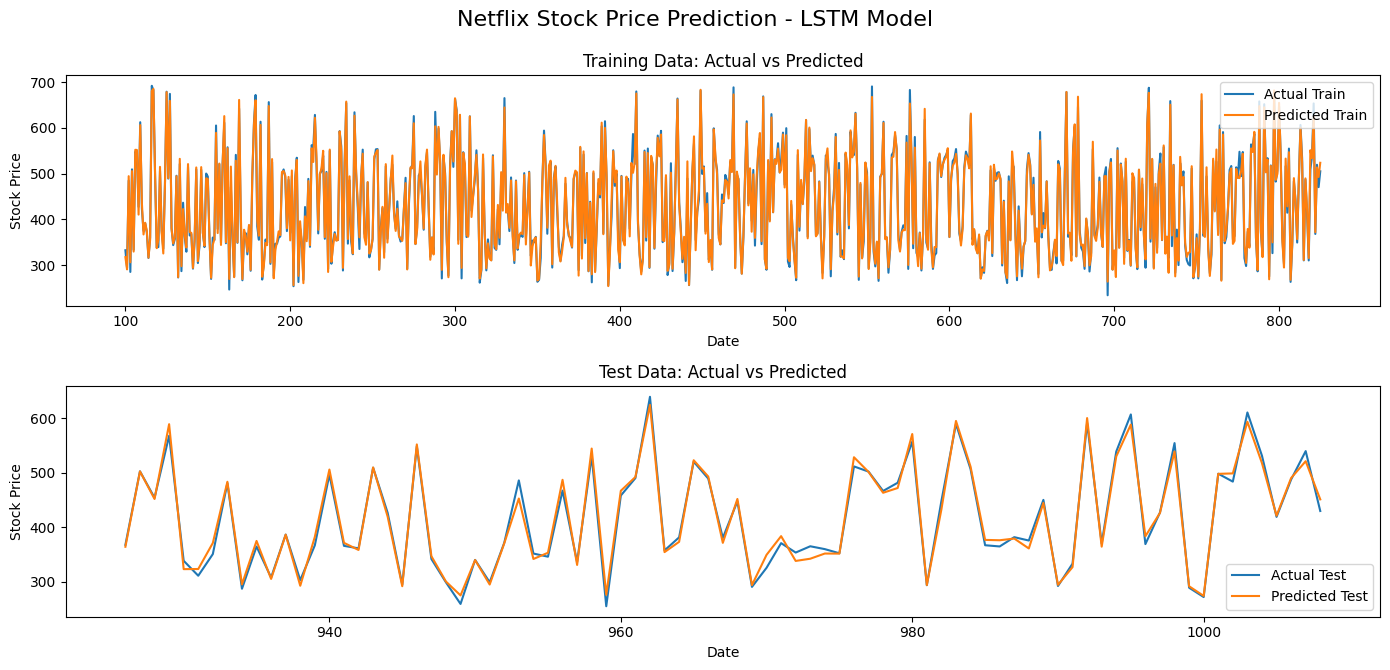

In [25]:
# Visualization
caption = "Netflix Stock Price Prediction - LSTM Model"
plt.figure(figsize=(14, 7))

# Plot for Training Data: Actual vs Predicted
plt.subplot(2, 1, 1)
plt.plot(df.index[time_step:len(train_pred_lstm) + time_step], scaler.inverse_transform(y_train.reshape(-1, 1)), label='Actual Train')
plt.plot(df.index[time_step:len(train_pred_lstm) + time_step], train_pred_lstm, label='Predicted Train')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Plot for Test Data: Actual vs Predicted
plt.subplot(2, 1, 2)
test_start_index = len(train_pred_lstm) + 2 * time_step
test_end_index = min(len(df) - 1, test_start_index + len(y_test) - 1)
plt.plot(df.index[test_start_index:test_end_index + 1], actual_test_data[:len(df.index[test_start_index:test_end_index + 1])], label='Actual Test')
plt.plot(df.index[test_start_index:test_end_index + 1], test_pred_lstm[:len(df.index[test_start_index:test_end_index + 1])], label='Predicted Test')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Display caption
plt.suptitle(caption, y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Linear Regression Model**

In [26]:
# Load the dataset for Logistic Regression Model
df = pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
df.set_index('Date', inplace=True)

In [27]:
# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']
x_lin_train = df[features].iloc[:int(len(df)*0.8)]
x_lin_test = df[features].iloc[int(len(df)*0.8):]
y_lin_train = df['Close'].iloc[:int(len(df)*0.8)]
y_lin_test = df['Close'].iloc[int(len(df)*0.8):]

In [28]:
# Train the Linear Regression model
model_lin = LinearRegression()
model_lin.fit(x_lin_train, y_lin_train)
y_pred_lin = model_lin.predict(x_lin_test)

In [29]:
# Evaluate the Linear Regression model
mse_lin = mean_squared_error(y_lin_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_lin_test, y_pred_lin)
mape_lin = mean_absolute_percentage_error(y_lin_test, y_pred_lin)
r2_lin = r2_score(y_lin_test, y_pred_lin)

In [30]:
print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin}")
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lin}")
print(f"R-squared (R2): {r2_lin}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 17.25720837610156
Root Mean Squared Error (RMSE): 4.154179627327345
Mean Absolute Error (MAE): 3.051103097108623
Mean Absolute Percentage Error (MAPE): 0.005673050128207859
R-squared (R2): 0.9965159161611913


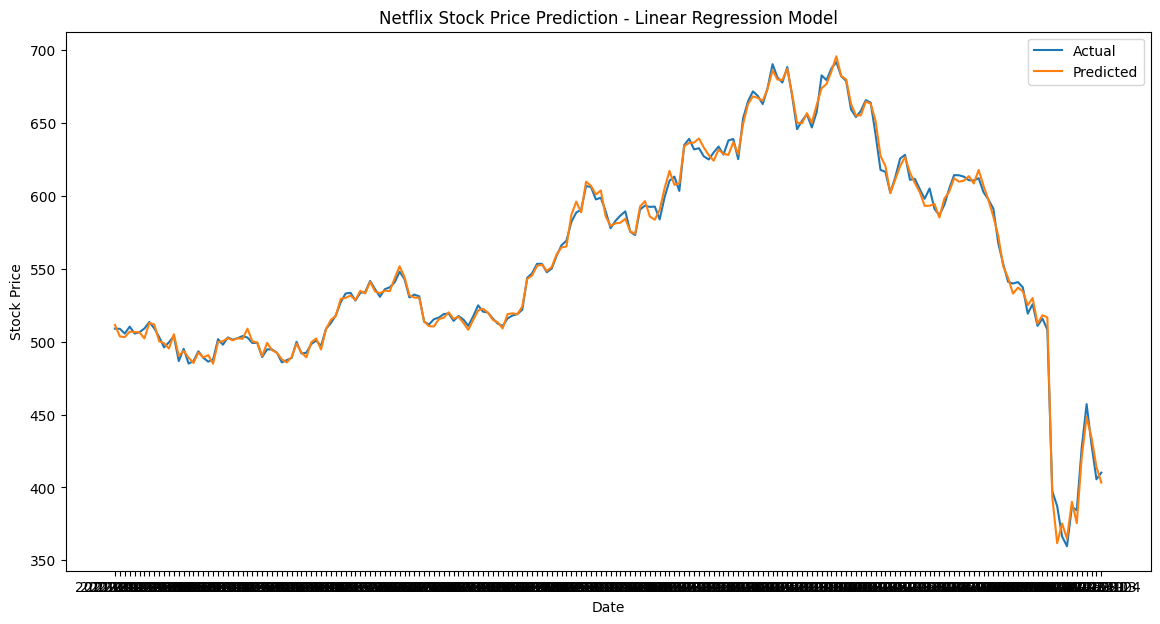

In [31]:
# Visualize Linear Regression predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[int(len(df)*0.8):], y_lin_test, label='Actual')
plt.plot(df.index[int(len(df)*0.8):], y_pred_lin, label='Predicted')
plt.title('Netflix Stock Price Prediction - Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### **The End**